<a href="https://colab.research.google.com/github/alanmejiaa/Procesamiento-y-Clasificacion-de-Datos-2024/blob/main/Tarea%20%233.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarea #3**

## Tarea (10 puntos)

- Hacer diseño de experimentos para comparar modelos y sus hiperparámetros con relación a la clasificación de textos
- Escribir un reporte con los hallazgos, metodología y resultados en PDF y subirlo en una sección claramente identificable de tu repositorio.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_net = pd.read_csv('disney.csv', encoding='latin-1')

In [4]:
df_net.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [5]:
# consideramos las columnas necesarias
df_net = df_net[['Review_Text','Rating']]

In [6]:
df_net.head()

,Review_Text,Rating
0,If you've ever been to Disneyland anywhere you...,4
1,Its been a while since d last time we visit HK...,4
2,Thanks God it wasn t too hot or too humid wh...,4
3,HK Disneyland is a great compact park. Unfortu...,4
4,"the location is not in the city, took around 1...",4


In [9]:
# crearemos una clasificacion para score que si menor o igual a 3 es negativo y si es mayor a 3 positivo
df_net['clasificacion'] = df_net['Rating'].apply(lambda x: 'positivo' if x > 3 else 'negativo')

In [10]:
df_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Review_Text    42656 non-null  object
 1   Rating         42656 non-null  int64 
 2   clasificacion  42656 non-null  object
dtypes: int64(1), object(2)
memory usage: 999.9+ KB


# Visualización de los datos

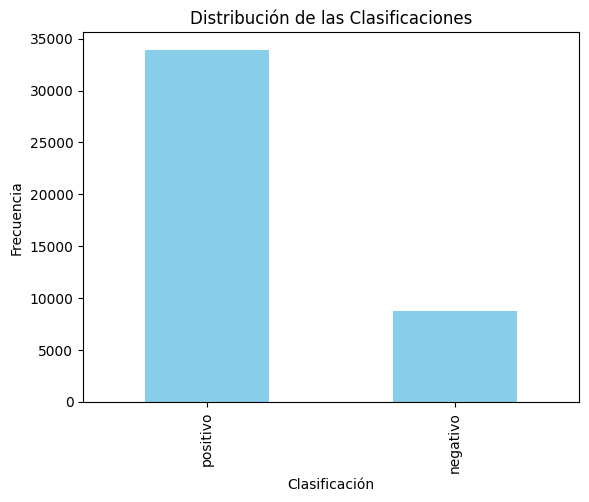

In [11]:
# distribución de las clasificaciones

df_net['clasificacion'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de las Clasificaciones')
plt.xlabel('Clasificación')
plt.ylabel('Frecuencia')
plt.show()

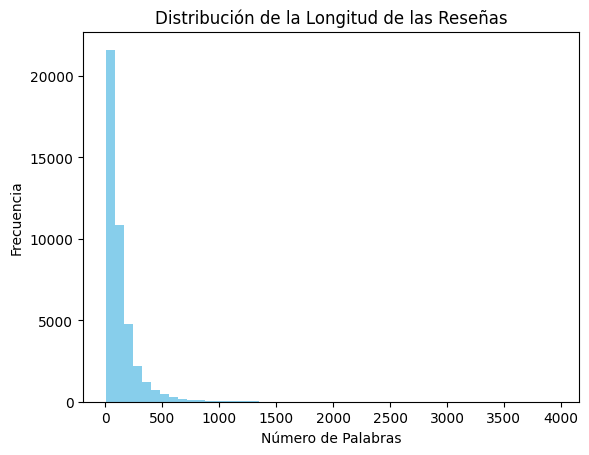

In [15]:
#distribución de número de palabras y la frecuencia de las reseñas

df_net['review_length'] = df_net['Review_Text'].apply(lambda x: len(str(x).split()))
df_net['review_length'].plot(kind='hist', bins=50, color='skyblue')
plt.title('Distribución de la Longitud de las Reseñas')
plt.xlabel('Número de Palabras')
plt.ylabel('Frecuencia')
plt.show()

In [16]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [22]:
# preprocesamiento del texto, eliminamos, limpiamos, tokenizamos, lematizamos
def preprocess_text(text):
    # Manejamos valores que no son cadenas de texto y regresamos cadenas vacias
    if not isinstance(text, (str, bytes)):
        return ""

    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# aplicamos
df_net['cleaned_review'] = df_net['Review_Text'].apply(preprocess_text)

In [23]:
print(df_net[['Review_Text', 'cleaned_content', 'clasificacion']].head())

                                         Review_Text  \
0  If you've ever been to Disneyland anywhere you...   
1  Its been a while since d last time we visit HK...   
2  Thanks God it wasn   t too hot or too humid wh...   
3  HK Disneyland is a great compact park. Unfortu...   
4  the location is not in the city, took around 1...   

                                     cleaned_content clasificacion  
0  ever disneyland anywhere find disneyland hong ...      positivo  
1  since last time visit hk disneyland yet time s...      positivo  
2  thanks god hot humid visiting park otherwise w...      positivo  
3  hk disneyland great compact park unfortunately...      positivo  
4  location city took around 1 hour kowlon kid li...      positivo  


# Modelos, vectores y resultados.

Entrenamiento y prueba

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [25]:
# dividimos los datos en conjuntos de entrenamiento y prueba 80 y 20
X = df_net['cleaned_content']
y = df_net['clasificacion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# vectorización
vectorizers = {
    "Count n-grams": CountVectorizer(ngram_range=(2, 3)),
    "TF-IDF": TfidfVectorizer(),
    "TF-IDF n-grams": TfidfVectorizer(ngram_range=(2, 3))
}

In [27]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
}

In [28]:
# entrenamos y evaluamos
results = []

for vec_name, vectorizer in vectorizers.items():
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    for model_name, model in models.items():
        model.fit(X_train_vec, y_train)
        y_pred = model.predict(X_test_vec)

        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        cm = confusion_matrix(y_test, y_pred)

        results.append({
            "Model": model_name,
            "Vectorizer": vec_name,
            "Accuracy": accuracy,
            "Report": report,
            "Confusion Matrix": cm
        })

In [29]:
for result in results:
    print(f"Model: {result['Model']} with {result['Vectorizer']}")
    print("Accuracy:", result["Accuracy"])
    df_report = pd.DataFrame(result["Report"]).transpose()
    print(df_report)
    print("\n" + "="*80 + "\n")

Model: Logistic Regression with Count n-grams
Accuracy: 0.8543131739334271
              precision    recall  f1-score      support
negativo       0.812195  0.379487  0.517282  1755.000000
positivo       0.858791  0.977276  0.914211  6777.000000
accuracy       0.854313  0.854313  0.854313     0.854313
macro avg      0.835493  0.678382  0.715746  8532.000000
weighted avg   0.849207  0.854313  0.832564  8532.000000


Model: Random Forest with Count n-grams
Accuracy: 0.7943037974683544
              precision    recall  f1-score      support
negativo       0.000000  0.000000  0.000000  1755.000000
positivo       0.794304  1.000000  0.885362  6777.000000
accuracy       0.794304  0.794304  0.794304     0.794304
macro avg      0.397152  0.500000  0.442681  8532.000000
weighted avg   0.630919  0.794304  0.703246  8532.000000


Model: Logistic Regression with TF-IDF
Accuracy: 0.8791608063759963
              precision    recall  f1-score      support
negativo       0.795752  0.554986  0.653911

In [30]:
# vectorizamos y entrenamos el modelo
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

best_model = LogisticRegression(C=1.0, solver='liblinear')
best_model.fit(X_train_vec, y_train)
y_pred = best_model.predict(X_test_vec)

# calculamos la matriz
cm = confusion_matrix(y_test, y_pred)

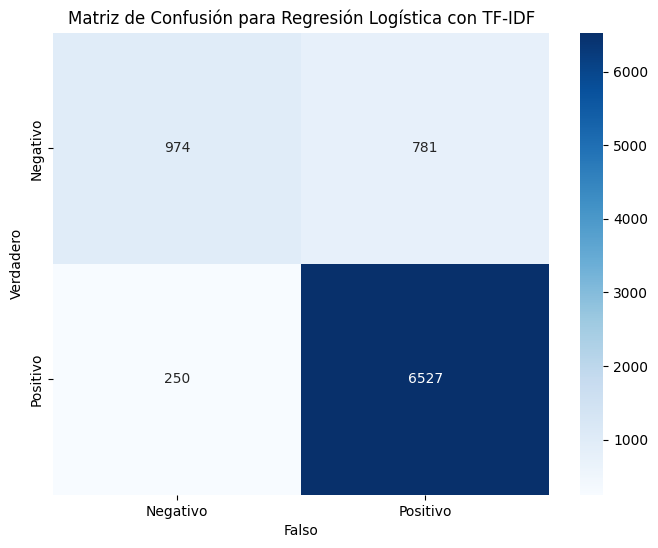

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.title('Matriz de Confusión para Regresión Logística con TF-IDF')
plt.xlabel('Falso')
plt.ylabel('Verdadero')
plt.show()

# Modelos hiperparametros ajustados

In [32]:
# aplicamos ajustes a los modelos
lr_params = {
    'C': 0.5,
    'solver': 'liblinear'
}

rf_params = {
    'n_estimators': 200,
    'max_depth': 20,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'random_state': 42
}

models_adjusted = {
    "Logistic Regression (Adjusted)": LogisticRegression(**lr_params),
    "Random Forest (Adjusted)": RandomForestClassifier(**rf_params)
}

In [33]:
# combinamos
models.update(models_adjusted)

In [34]:
# entrenamiento y evaluacion del modelo
results = []

for vec_name, vectorizer in vectorizers.items():
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    for model_name, model in models.items():
        model.fit(X_train_vec, y_train)
        y_pred = model.predict(X_test_vec)

        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        cm = confusion_matrix(y_test, y_pred)

        results.append({
            "Model": model_name,
            "Vectorizer": vec_name,
            "Accuracy": accuracy,
            "Report": report,
            "Confusion Matrix": cm
        })

In [35]:
for result in results:
    print(f"Model: {result['Model']} with {result['Vectorizer']}")
    print("Accuracy:", result["Accuracy"])
    df_report = pd.DataFrame(result["Report"]).transpose()
    print(df_report)
    print("\n" + "="*80 + "\n")

Model: Logistic Regression with Count n-grams
Accuracy: 0.8543131739334271
              precision    recall  f1-score      support
negativo       0.812195  0.379487  0.517282  1755.000000
positivo       0.858791  0.977276  0.914211  6777.000000
accuracy       0.854313  0.854313  0.854313     0.854313
macro avg      0.835493  0.678382  0.715746  8532.000000
weighted avg   0.849207  0.854313  0.832564  8532.000000


Model: Random Forest with Count n-grams
Accuracy: 0.7943037974683544
              precision    recall  f1-score      support
negativo       0.000000  0.000000  0.000000  1755.000000
positivo       0.794304  1.000000  0.885362  6777.000000
accuracy       0.794304  0.794304  0.794304     0.794304
macro avg      0.397152  0.500000  0.442681  8532.000000
weighted avg   0.630919  0.794304  0.703246  8532.000000


Model: Logistic Regression (Adjusted) with Count n-grams
Accuracy: 0.8540787623066104
              precision    recall  f1-score      support
negativo       0.821970  

In [36]:
# vectorizacion y entrenamiento
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

best_model = LogisticRegression(C=0.5, solver='liblinear')
best_model.fit(X_train_vec, y_train)
y_pred = best_model.predict(X_test_vec)

# calculamos
cm = confusion_matrix(y_test, y_pred)

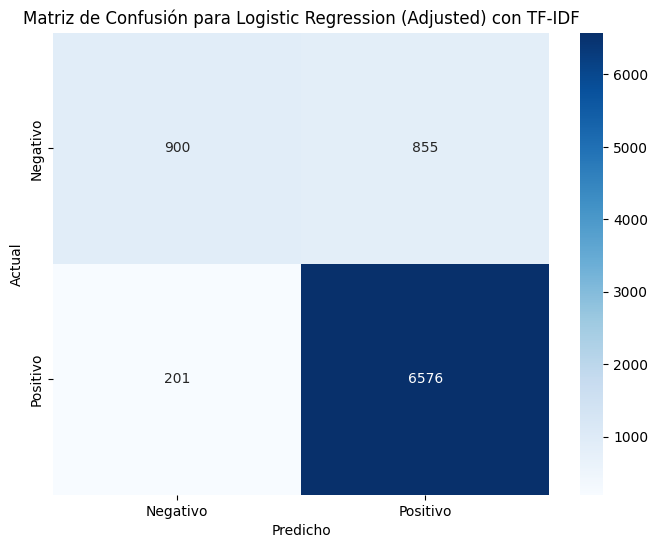

In [37]:
# matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.title('Matriz de Confusión para Logistic Regression (Adjusted) con TF-IDF')
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.show()